In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [4]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
cluster_std=0.60, random_state=0)
X = X[:, ::-1] # 交换列是为了方便画图

E:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# 高斯混合模型
## 高斯混合模型（GMM） 为什么会出现
理解 k-means 模型的一种方法是，它在每个簇的中心放置了一个圆圈（在更高维空间中是一个超空间），圆圈半径根据最远的点与簇中心点的距离算出。这个半径作为训练集分配簇的硬切断（hard cutoff），即在这个圆圈之外的任何点都不是该簇的成员。可以用以下函数将这个聚类模型可视化：

In [5]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    # 画出输入数据
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    
    # 画出k-means模型的表示
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
            for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

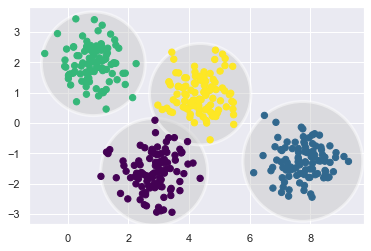

In [6]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

k-means 有一个重要特征，它要求这些簇的模型必须是圆形： k-means 算法没有内置的方法来实现椭圆形的簇。因此，如果对同样的数据进行一些转换，簇的分配就会变得混乱：

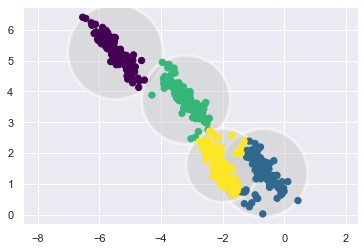

In [7]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

你可能想通过对 k-means 模型进行一般化处理来弥补这些不足，例如可以通过比较每个点与所有簇中心点的距离来度量簇分配的不确定性，而不仅仅是关注最近的簇。你也可能想通过将簇的边界由圆形放宽至椭圆形，从而得到非圆形的簇。实际上，这正是另一种的聚类模型——高斯混合模型——的两个基本组成部分。

## 一般化E-M： 高斯混合模型

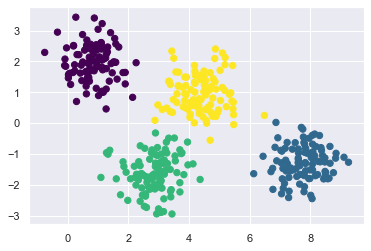

In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

但由于 GMM 有一个隐含的概率模型，因此它也可能找到簇分配的概率结果——在 ScikitLearn 中用 predict_proba 方法实现。这个方法返回一个大小为\[n_samples, n_clusters\]的矩阵，矩阵会给出任意点属于某个簇的概率：

In [10]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.463 0.    0.537]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]
